<a href="https://colab.research.google.com/github/HalyshAnton/IT-Step-Pyton-AI/blob/main/module5/Computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Сегментації зображень

У сфері комп'ютерного зору сегментація зображень є фундаментальним завданням, яке передбачає поділ зображення на значущі області або об'єкти. Вона спрямована на розуміння змісту зображення шляхом присвоєння мітки (категорії) кожному пікселю. Це дозволяє виокремити певні об'єкти, проаналізувати їхні форми та взаємозв'язки, а також отримати глибшу інформацію з даних зображення.

**Приклади застосування сегментації зображень**

* **Самокеровані автомобілі:** Сегментація смуг руху, транспортних засобів і пішоходів для автономної навігації.
* **Медична візуалізація:** Ідентифікація пухлин, органів та інших структур на медичних знімках для діагностики та аналізу.
* **Розпізнавання об'єктів:** Виділення цікавих об'єктів для кращого розпізнавання та класифікації.
* **Редагування зображень:** Автоматизація видалення фону (наприклад, зелений екран) або маніпуляцій з об'єктами (наприклад, масштабування з урахуванням вмісту).

![](https://viso.ai/wp-content/uploads/2021/03/image-segmentation-example-1060x397.jpg)

## Типи сегментації зображень

Існують різні підходи до сегментації зображень, які класифікуються залежно від рівня деталізації та наданої інформації:

* **Semantic Segmentation:** Призначає кожному пікселю мітку класу (наприклад, небо, автомобіль, дорога), що дає змогу зрозуміти вміст зображення на високому рівні.
* **Instance Segmentation:** Розрізняє екземпляри одного класу об'єктів. Наприклад, сегментація окремих автомобілів на парковці замість того, щоб просто позначити всю область як "автомобілі".
* **Panoptic Segmentation:** Поєднує семантичну сегментацію та сегментацію екземплярів, надаючи як мітки класів, так і окремі екземпляри об'єктів.

![](https://builtin.com/sites/www.builtin.com/files/styles/ckeditor_optimize/public/inline-images/1_image-segmentation%202.jpeg)

## Методи сегментації зображень

1. **Thresholding:** Проста техніка, яка розділяє пікселі на основі значень їхньої інтенсивності. Ефективна для зображень з високим контрастом між переднім і заднім планом.

2. **Edge Detection:** Визначає межі між об'єктами, виявляючи різкі зміни в інтенсивності або кольорі. Краї можна використовувати як відправну точку для подальшої сегментації.

3. **Region-based Segmentation:** Групує пікселі зі схожими характеристиками (колір, інтенсивність, текстура) у регіони, що відповідають об'єктам. Такі методи, як кластеризація K-середніх або сегментація вододілів, належать до цієї категорії.

4. **Deep Learning-based Segmentation:** Згорткові нейронні мережі (CNN) зробили революцію в сегментації зображень. Такі популярні архітектури, як U-Net, FCN (Fully Convolutional Network) та DeepLab досягають високої точності завдяки вивченню складних взаємозв'язків між пікселями та відповідними їм класами об'єктів.

![](https://www.researchgate.net/publication/323597886/figure/fig2/AS:601386504957959@1520393124691/Convolutional-neural-network-CNN-architecture-based-on-UNET-Ronneberger-et-al.png)

![](https://www.researchgate.net/publication/350119533/figure/fig1/AS:1020546649169926@1620328690347/Network-structure-of-DeepLab-V3-The-DeepLab-V3-network-uses-dilated-convolution-and.png)

[Документація](https://pytorch.org/vision/stable/models.html#semantic-segmentation)

In [53]:
import torch
from torchvision.io.image import read_image
from torchvision.models.segmentation import fcn_resnet50, FCN_ResNet50_Weights
from torchvision import transforms

# Завантажуємо зображення
img = read_image("/content/golden-retriever-royalty-free-image-506756303-1560962726.jpg")

# Змінюємо розмір
img = transforms.Resize((520, 520))(img)

# Завантажуємо натреновану модель
weights = FCN_ResNet50_Weights.DEFAULT
model = fcn_resnet50(weights=weights)
model.eval()

# Завантажуємо препроцесор для моделі(без зміни розмірів)
preprocess = weights.transforms(resize_size=None)

# Обробляєио забраження та змінюємо розмірність до [1, 3, width, height]
batch = preprocess(img)
batch = batch.unsqueeze(0)

# Робимо прогноз
with torch.no_grad():
  prediction = model(batch)["out"]

masks = prediction.argmax(dim=1)
mask = masks[0]

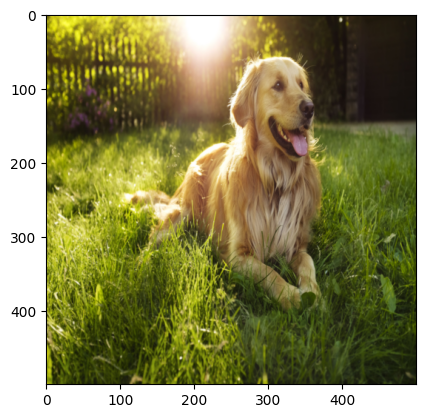

In [54]:
import matplotlib.pyplot as plt

# Візуалізація
plt.imshow(img.permute(1, 2, 0))

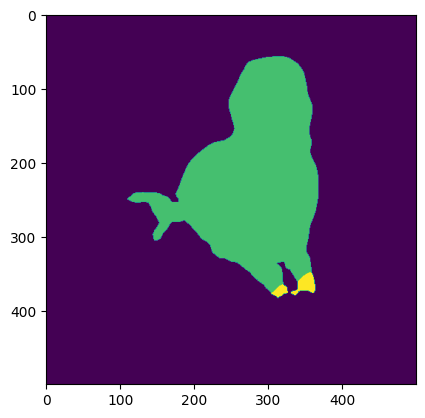

In [55]:
plt.imshow(mask)

In [56]:
mask.unique()

tensor([ 0, 12, 17])

In [57]:
# Індекси класів
class_to_idx = {cls: idx for (idx, cls) in enumerate(weights.meta["categories"])}
class_to_idx

{'__background__': 0,
 'aeroplane': 1,
 'bicycle': 2,
 'bird': 3,
 'boat': 4,
 'bottle': 5,
 'bus': 6,
 'car': 7,
 'cat': 8,
 'chair': 9,
 'cow': 10,
 'diningtable': 11,
 'dog': 12,
 'horse': 13,
 'motorbike': 14,
 'person': 15,
 'pottedplant': 16,
 'sheep': 17,
 'sofa': 18,
 'train': 19,
 'tvmonitor': 20}

[Документація по візуалізації](https://pytorch.org/vision/stable/auto_examples/others/plot_visualization_utils.html#visualizing-segmentation-masks)

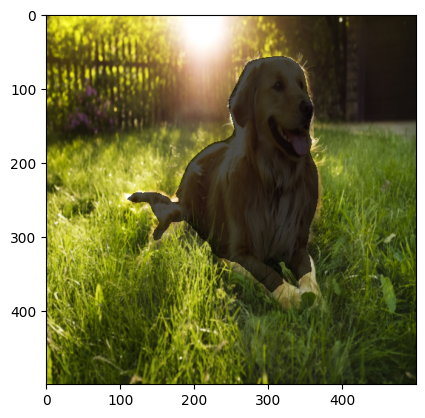

In [66]:
from torchvision.utils import draw_segmentation_masks

dog_mask = mask == class_to_idx['dog']

masked_img = draw_segmentation_masks(img, dog_mask, alpha=0.7)

plt.imshow(masked_img.permute(1, 2, 0))

Власна візуалізація

In [94]:
img.shape

torch.Size([3, 500, 500])

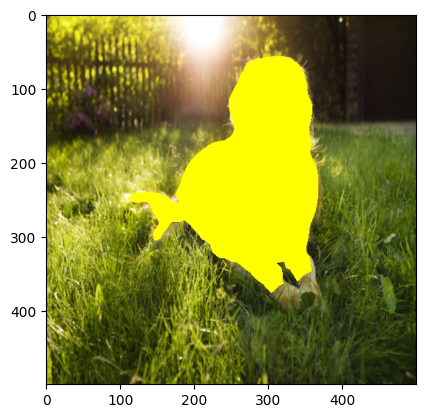

In [96]:
masked_img = img.clone() # копіювання
masked_img = masked_img.to(int) # зміна типу даних на int

yellow_pixel = torch.tensor([255, 255, 0])
masked_img[:, dog_mask] = yellow_pixel.view(-1, 1)

plt.imshow(masked_img.permute(1, 2, 0))

# Виявлення об'єктів

Виявлення об'єктів - це фундаментальна задача комп'ютерного зору, яка має на меті ідентифікувати та визначити місцезнаходження об'єктів на зображенні або відео. Воно виходить за рамки простої класифікації зображень (визначення того, що є на зображенні) і полягає у точному визначенні конкретного місця розташування цих об'єктів.

Цей посібник заглиблюється у світ виявлення об'єктів, охоплюючи його застосування, загальні підходи та принцип роботи.

**Сфери застосування виявлення об'єктів:**

* **Самокеровані автомобілі:** Ідентифікація пішоходів, транспортних засобів і дорожніх знаків для безпечної навігації.
* **Розпізнавання облич:** Виявлення облич на зображеннях і відео для систем безпеки, маркетингу та соціальних мереж.
* **Медична візуалізація:** Виявлення пухлин та інших аномалій на рентгенівських або МРТ-знімках.
* **Аналітика роздрібної торгівлі:** Відстеження поведінки клієнтів і виявлення об'єктів, що представляють інтерес в магазинах.
* **Відеоспостереження:** Виявлення підозрілої активності або моніторинг певних зон.

![](https://kajabi-storefronts-production.kajabi-cdn.com/kajabi-storefronts-production/file-uploads/blogs/22606/images/1446e76-f181-6047-4e73-8d8ba3c6a50e_object_detection_1.webp)

# Поширені підходи до виявлення об'єктів

Існує два основних підходи до виявлення об'єктів:

1. **Двоетапне виявлення:**
    * Цей підхід передбачає два окремі етапи:
        * **Пропозиція областей:** Модель пропонує області-кандидати на зображенні, які можуть містити об'єкти.
        * **Класифікація та уточнення:** Ці запропоновані області потім класифікуються (що це за об'єкт?) та уточнюються (коригується обмежувальна рамка для кращої локалізації).
    * Приклади: R-CNN (Регіони з ознаками CNN), Faster R-CNN (швидша версія R-CNN), Mask R-CNN (додатково прогнозує маски об'єктів для сегментації).

2. **Одноступеневе розпізнавання:**.
    * Цей підхід безпосередньо передбачає граничні поля та ймовірності класів за один крок.
    * Зазвичай він швидший за двоетапне виявлення, але може бути менш точним для складних сцен.
    * Приклади: YOLO (You Only Look Once), SSD (Single Shot MultiBox Detector).

![](https://ars.els-cdn.com/content/image/1-s2.0-S1051200420301019-gr001.jpg)

![](https://miro.medium.com/v2/resize:fit:678/1*MO3DCmsUqzF23MsQh_CDng.png)

In [ ]:
!pip install -q ultralytics

# Дифузійні моделі

Дифузійні моделі - це потужний клас генеративних моделей у глибокому навчанні, які можуть створювати високоточні зображення шляхом поступового додавання деталей до шуму. На відміну від традиційних генеративних моделей, які вивчають відображення від прихованого простору до зображення, дифузійні моделі вивчають зворотний процес: перетворення чистого зображення на шум. Потім вони вчаться зворотному процесу дифузії, ефективно знебарвлюючи зображення і відновлюючи вихідні дані.

**Ключові поняття в дифузійних моделях**

1. **Процес дифузії:** Модель бере чисте зображення і поступово вводить в нього шум за допомогою серії кроків, перетворюючи його на чистий шум. Це "псує" зображення контрольованим чином.
2. **Архітектура U-Net:** Типова архітектура дифузійної моделі нагадує U-Net зі структурою кодер-декодер. Кодер стискає зашумлене зображення під час процесу дифузії, в той час як декодер вчиться зворотному додаванню шуму під час процесу знешумлення (або генерації зображення).
3. **Мережа предикторів:** На кожному кроці дифузії мережа предикторів приймає поточне зашумлене зображення як вхідні дані і пророкує шум, який було додано на попередньому кроці. Мінімізуючи різницю між прогнозованим шумом і фактичним шумом, модель навчається процесу зашумлення.

![](https://miro.medium.com/v2/resize:fit:700/1*KtgUrX1_McQig6unuOsU4g.png)

## Генерація зображень за допомогою дифузійних моделей

1. **Почати з шуму:** Процес починається з чистого шуму як початкового вхідного сигналу.
2. **Зворотні кроки дифузії:** Модель ітеративно застосовує вивчений процес згладжування, поступово видаляючи шум і відновлюючи деталі зображення.
3. **Формування зображення:** За допомогою декількох етапів знешумлення модель поступово покращує зображення, зрештою генеруючи високоякісне зображення з початкового шуму.

**Переваги дифузійних моделей:**

* **Високоточна генерація зображень:** Дифузійні моделі можуть створювати неймовірно реалістичні та деталізовані зображення, часто перевершуючи за якістю інші генеративні моделі.
* **Різноманітність зразків:** Регулюючи рівень шуму в процесі генерації, дифузійні моделі можуть створювати різноманітні варіації зображень, зберігаючи при цьому когерентність.
* **Менші вимоги до навчання:** Порівняно з деякими генеративними моделями, дифузійні моделі можуть досягати хороших результатів навіть з меншими навчальними наборами даних.

![](https://miro.medium.com/v2/resize:fit:1400/1*418rztXdF877Nfrh38wIhA.png)

## Застосування дифузійних моделей

* **Редагування зображень:** Дифузійні моделі можна використовувати для таких завдань, як зафарбовування зображень (заповнення відсутніх ділянок зображення) або перенесення стилю (застосування художнього стилю одного зображення до іншого).
* **Синтез текст-зображення:** Дифузійні моделі можуть бути обумовлені текстовими описами, щоб генерувати зображення, які відповідають текстовому вводу.
* **Генеративний дизайн:** Дифузійні моделі можна використовувати для творчих пошуків і дизайнерських завдань, генеруючи нові варіації зображень на основі підказок користувача.